In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
u = mda.Universe('6.6_2.gro','old_trajs/rep1_skip10.xtc')
a = u.select_atoms('(resid 22) and (name NH1 NH2)')
a1 = u.select_atoms('(resid 33) and (name NZ)')

PL = u.select_atoms('resname POPC DOPE SAPI and (type O)')


In [8]:
irdf1 = rdf.InterRDF(a,PL,
                    nbins=150,
                    range=(0.0, 20.0),
                    )
irdf2 = rdf.InterRDF(a1,PL,
                    nbins=150,
                    range=(0.0, 20.0),
                    )

In [9]:
irdf1.run()
irdf2.run()

irdf1.bins
irdf2.bins

/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


array([ 0.06666667,  0.2       ,  0.33333333,  0.46666667,  0.6       ,
        0.73333333,  0.86666667,  1.        ,  1.13333333,  1.26666667,
        1.4       ,  1.53333333,  1.66666667,  1.8       ,  1.93333333,
        2.06666667,  2.2       ,  2.33333333,  2.46666667,  2.6       ,
        2.73333333,  2.86666667,  3.        ,  3.13333333,  3.26666667,
        3.4       ,  3.53333333,  3.66666667,  3.8       ,  3.93333333,
        4.06666667,  4.2       ,  4.33333333,  4.46666667,  4.6       ,
        4.73333333,  4.86666667,  5.        ,  5.13333333,  5.26666667,
        5.4       ,  5.53333333,  5.66666667,  5.8       ,  5.93333333,
        6.06666667,  6.2       ,  6.33333333,  6.46666667,  6.6       ,
        6.73333333,  6.86666667,  7.        ,  7.13333333,  7.26666667,
        7.4       ,  7.53333333,  7.66666667,  7.8       ,  7.93333333,
        8.06666667,  8.2       ,  8.33333333,  8.46666667,  8.6       ,
        8.73333333,  8.86666667,  9.        ,  9.13333333,  9.26

/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and 

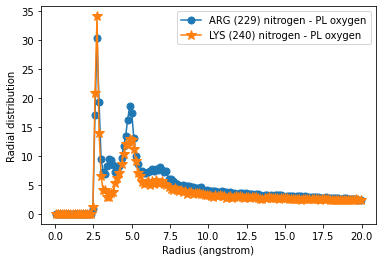

In [27]:
irdf1.bins
fig ,ax = plt.subplots()
plt.plot(irdf1.bins, irdf1.rdf, label='ARG (229) nitrogen - PL oxygen',marker = '.', markersize=14)
plt.plot(irdf2.bins, irdf2.rdf, label='LYS (240) nitrogen - PL oxygen', marker='*', markersize =10)

# plt.plot(irdf.bins, irdf3.rdf, label='Q35 (NH) - resid 7 (cys) S')
# plt.plot(irdf.bins, irdf4.rdf, label='Q35 (NH) - resid 11 (trp) N')
plt.legend()
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
# plt.ylim(0,17500)
#plt.title('ARG (resid 22) nitrogen to PL oxygen')
plt.savefig('arg_lys_rdf.png', dpi=200)
plt.show()